In [26]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob

import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer  
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stop_words = nltk.corpus.stopwords.words(['english'])

# os.chdir('c:\\Users\\Owner\\Desktop\\Sem4\\Capstone\\Project\\')
# os.getcwd()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikhiljoshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
tweets=pd.read_csv('/Users/nikhiljoshi/Capstone Project/EDA Files/after_eda.csv')
#tweets=pd.read_csv('C:\\Users\\W0780808\\Downloads\\after_eda.csv')
tweets_orig=tweets
tweets_orig

,Datetime,Tweet Id,Text,Location,Retweet,Like,new_Hashtags
0,2022-05-28 14:07:28,1530551333899616256,@elonmusk i think twitter bird is now free. Bu...,NaN,1,1,chinesevirus
1,2022-05-28 10:07:40,1530490986001969152,@joydeepg9 @Deekay01119442 @TNSubbaRao1 There ...,बस यहीं..,0,2,chinesevirus bollywoodias
2,2022-05-28 04:16:27,1530402599618244610,@nytimes Once again the entitled NYT wants to ...,NaN,0,0,chinesevirus
3,2022-05-27 15:47:59,1530214238320467969,#NoWonder #China's #WhiteTerror or #BlueTerror...,NaN,2,6,nowonder china whiteterror blueterror ccp free...
4,2022-05-27 15:31:08,1530210001649811458,"Hey, what a surprise, 1 year later and nada! #...",New York,1,0,justafriendlyreminder chinesevirus coverup
...,...,...,...,...,...,...,...
505101,2017-12-31 09:30:00,947399429383786496,Father returns from overseas wedding after son...,San Francisco,0,1,aapi
505102,2017-12-31 09:00:01,947391885525516288,Future unclear for White House Commission on #...,San Francisco,0,1,asian aapi
505103,2017-12-31 08:22:32,947382453009879040,Happy New year to my fav #Aapi on #Twitter @Ar...,"Lleida, España",1,0,aapi twitter
505104,2017-12-31 06:30:00,947354130661519361,NY Times called out for misstep in Asian cultu...,San Francisco,0,1,aapi


In [28]:
def decontracted(phrase):

    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    #phrase = re.sub(r"n't", " not", phrase) # resulted in "ca not" when sentence started with "can't"
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)
    #phrase = re.sub(r"n't", " not", phrase) # resulted in "ca not" when sentence started with "can't"
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)
    return phrase



In [29]:
import emoji
# Remove cant wont words
tweets['Text']=tweets['Text'].apply(lambda x : decontracted(x))

    #LOWERCASE
tweets['Text']=tweets['Text'].apply(lambda x : x.lower())

# removing emojis
def strip_emoji(text):
    return re.sub(emoji.get_emoji_regexp(), r"", tweets['Text'])

In [30]:
def cleaning(data):
    #remove urls
    tweet_without_url = re.sub(r'http\S+',' ', data)

    #remove hashtags
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)

    #3. Remove mentions and characters that not in the English alphabets
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    #2. Tokenize
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)

    #3. Remove Puncs
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]

    #6. Joining
    return " ".join(text_cleaned)


In [31]:
#nltk.download('omw-1.4')
tweets['Text']=tweets['Text'].apply(cleaning)

In [32]:
tweets.head()

,Datetime,Tweet Id,Text,Location,Retweet,Like,new_Hashtags
0,2022-05-28 14:07:28,1530551333899616256,think twitter bird free cage china,NaN,1,1,chinesevirus
1,2022-05-28 10:07:40,1530490986001969152,sea change indian temperament lately yr galwan...,बस यहीं..,0,2,chinesevirus bollywoodias
2,2022-05-28 04:16:27,1530402599618244610,entitled nyt want lecture darker colored every...,NaN,0,0,chinesevirus
3,2022-05-27 15:47:59,1530214238320467969,terrorizing chinese people regime work,NaN,2,6,nowonder china whiteterror blueterror ccp free...
4,2022-05-27 15:31:08,1530210001649811458,hey surprise year later nada,New York,1,0,justafriendlyreminder chinesevirus coverup


In [33]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [34]:
tweets['Subjectivity'] = tweets['Text'].apply(getSubjectivity)
tweets['Polarity'] = tweets['Text'].apply(getPolarity)
tweets.head()


,Datetime,Tweet Id,Text,Location,Retweet,Like,new_Hashtags,Subjectivity,Polarity
0,2022-05-28 14:07:28,1530551333899616256,think twitter bird free cage china,NaN,1,1,chinesevirus,0.8000,0.4
1,2022-05-28 10:07:40,1530490986001969152,sea change indian temperament lately yr galwan...,बस यहीं..,0,2,chinesevirus bollywoodias,0.4375,0.1
2,2022-05-28 04:16:27,1530402599618244610,entitled nyt want lecture darker colored every...,NaN,0,0,chinesevirus,0.0000,0.0
3,2022-05-27 15:47:59,1530214238320467969,terrorizing chinese people regime work,NaN,2,6,nowonder china whiteterror blueterror ccp free...,0.0000,0.0
4,2022-05-27 15:31:08,1530210001649811458,hey surprise year later nada,New York,1,0,justafriendlyreminder chinesevirus coverup,0.0000,0.0


In [35]:
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

tweets['Sentiment'] = tweets['Polarity'].apply(getSentiment)


In [36]:
tweets.head()

,Datetime,Tweet Id,Text,Location,Retweet,Like,new_Hashtags,Subjectivity,Polarity,Sentiment
0,2022-05-28 14:07:28,1530551333899616256,think twitter bird free cage china,NaN,1,1,chinesevirus,0.8000,0.4,Positive
1,2022-05-28 10:07:40,1530490986001969152,sea change indian temperament lately yr galwan...,बस यहीं..,0,2,chinesevirus bollywoodias,0.4375,0.1,Positive
2,2022-05-28 04:16:27,1530402599618244610,entitled nyt want lecture darker colored every...,NaN,0,0,chinesevirus,0.0000,0.0,Neutral
3,2022-05-27 15:47:59,1530214238320467969,terrorizing chinese people regime work,NaN,2,6,nowonder china whiteterror blueterror ccp free...,0.0000,0.0,Neutral
4,2022-05-27 15:31:08,1530210001649811458,hey surprise year later nada,New York,1,0,justafriendlyreminder chinesevirus coverup,0.0000,0.0,Neutral


<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

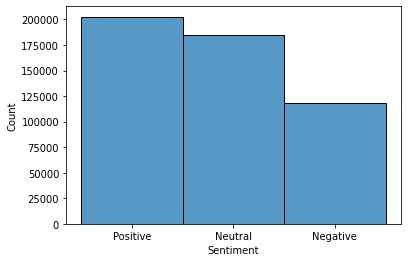

In [37]:
sns.histplot(tweets['Sentiment'])

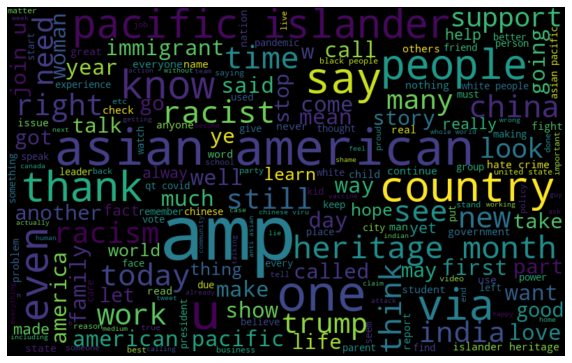

In [38]:
all_words = ' '.join([text for text in tweets['Text']]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()
## We cant really see the words associated with potive or negatove tweets hence we'll plot them seperately

### Negative Tweets Wordcloud

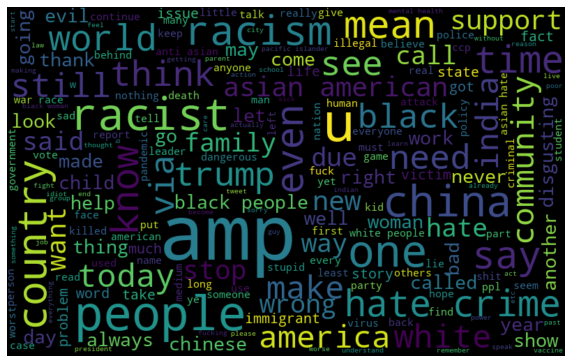

In [39]:
normal_words =' '.join([text for text in tweets['Text'][tweets['Sentiment'] == "Negative"]]) 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Positive tweets wordcloud

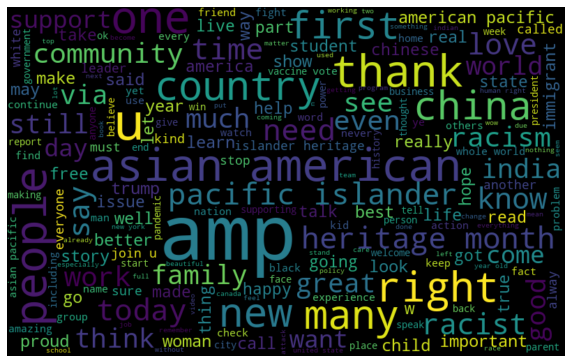

In [40]:
normal_words =' '.join([text for text in tweets['Text'][tweets['Sentiment'] == "Positive"]]) 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### defining training data set

In [45]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
df=pd.read_csv('/Users/nikhiljoshi/Capstone Project/ML Models/minimum_cleaned_final_training_data.csv')
#df  =   pd.read_csv('C:\\Users\\W0780808\\Downloads\\minimum_cleaned_final_training_data.csv')
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
import gensim

### Out of BoW/TFIDF/Word2Vec/Doc2Vec, we are using Word2Vec

In [46]:
#documents = [_text.split() for _text in df_train.Text]

In [47]:
# w2v_model = gensim.models.word2vec.Word2Vec(vector_size=300, 
#                                             window=7, 
#                                             min_count=10, 
#                                             workers=8)

In [48]:
# print("TRAIN size:", len(df_train))
# print("TEST size:", len(df_test))

In [49]:
# w2v_model.build_vocab(documents)


In [50]:

# words = w2v_model.wv.key_to_index
# vocab_size = len(words)
# print("Vocab size", vocab_size)

In [51]:
# w2v_model.train(documents, total_examples=len(documents), epochs=2)


In [52]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools


In [53]:
# !pip install tensorflow

# from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.Text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.Text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 9457
Total words 9457


In [54]:
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.Text), maxlen=300)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.Text), maxlen=300)


In [55]:
# labels = df_train.label.unique().tolist()
# labels

In [56]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df_train.label.tolist())

y_train = encoder.transform(df_train.label.tolist())
y_test = encoder.transform(df_test.label.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (2526, 1)
y_test (632, 1)


In [57]:
# embedding_matrix = np.zeros((vocab_size, 300))
# for word, i in tokenizer.word_index.items():
#   if word in w2v_model.wv:
#     embedding_matrix[i] = w2v_model.wv[word]
# print(embedding_matrix.shape)


### LSTYM from websiote

In [58]:
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

NameError: name 'embedding_matrix' is not defined

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          2837100   
                                                                 
 dropout (Dropout)           (None, 300, 300)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 2,997,601
Trainable params: 160,501
Non-trainable params: 2,837,100
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=1024,
                    epochs=5,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/5
3/3 [==============================] - 30s 8s/step - loss: 0.6630 - accuracy: 0.3889 - val_loss: 0.5967 - val_accuracy: 0.3755 - lr: 0.0010
Epoch 2/5
3/3 [==============================] - 27s 8s/step - loss: 0.5584 - accuracy: 0.3775 - val_loss: 0.6633 - val_accuracy: 0.3755 - lr: 0.0010
Epoch 3/5
3/3 [==============================] - 29s 9s/step - loss: 0.5776 - accuracy: 0.3775 - val_loss: 0.6451 - val_accuracy: 0.3755 - lr: 0.0010
Epoch 4/5
3/3 [==============================] - 29s 8s/step - loss: 0.5544 - accuracy: 0.3775 - val_loss: 0.6030 - val_accuracy: 0.3755 - lr: 0.0010
Epoch 5/5
3/3 [==============================] - 32s 10s/step - loss: 0.5450 - accuracy: 0.3775 - val_loss: 0.5938 - val_accuracy: 0.3755 - lr: 0.0010


In [ ]:
score = model.evaluate(x_test, y_test, batch_size=1024)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

1/1 [==============================] - 1s 1s/step - loss: 0.5285 - accuracy: 0.3370

ACCURACY: 0.33702531456947327
LOSS: 0.5284848809242249


In [ ]:
SENTIMENT_THRESHOLDS = (0.4, 0.7)
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = 0
        
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = 2
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = 1

        return label
    else:
        return 1 if score < 0.5 else 2

In [ ]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=300)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [ ]:
y_pred_1d = []
y_test_1d = list(df_test.label)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

1/1 [==============================] - 1s 1s/step


In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

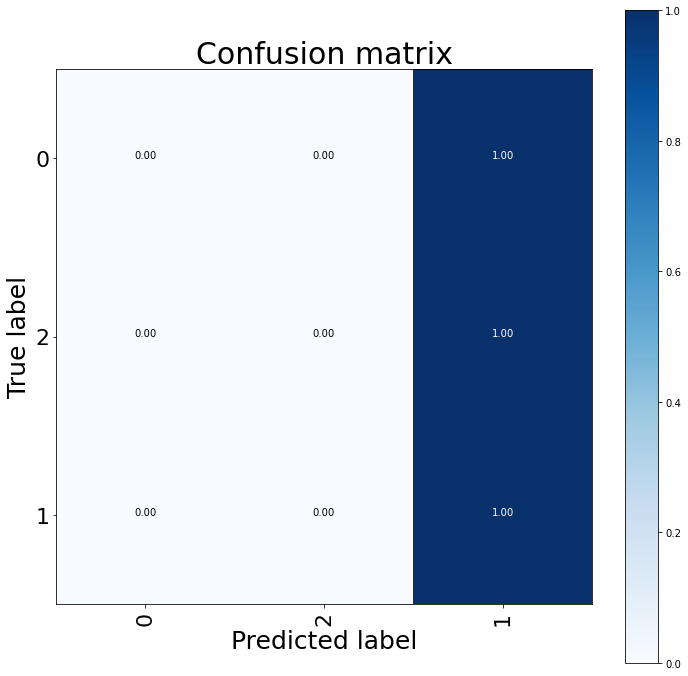

In [ ]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.label.unique(), title="Confusion matrix")
plt.show()

### https://www.kaggle.com/code/nitin194/twitter-sentiment-analysis-word2vec-doc2vec/notebook
#as per the websiteabove

### SVM using TFIDF

In [ ]:
# print("TRAIN size:", len(df_train))
# print("TEST size:", len(df_test))

from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(df_train['Text'])
test_vectors = vectorizer.transform(df_test['Text'])

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, df_train['label'])
prediction_linear = classifier_linear.predict(test_vectors)
# results

report = classification_report(df_test['label'], prediction_linear, output_dict=True)
print('positive: ', report["1"])
print('negative: ', report["2"])

positive:  {'precision': 0.7945205479452054, 'recall': 0.8169014084507042, 'f1-score': 0.8055555555555557, 'support': 213}
negative:  {'precision': 0.7252747252747253, 'recall': 0.4520547945205479, 'f1-score': 0.5569620253164557, 'support': 146}


In [ ]:
import pickle
# pickling the vectorizer
pickle.dump(vectorizer, open('vectorizer.sav', 'wb'))
# pickling the model
pickle.dump(classifier_linear, open('classifier.sav', 'wb'))

### GLOVE EMBEDDING

In [ ]:
x = df['Text']
y = df['label']

print(len(x), len(y))

3158 3158


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

2368 2368
790 790


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [ ]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<2368x8756 sparse matrix of type '<class 'numpy.float64'>'
	with 53086 stored elements in Compressed Sparse Row format>

### Embeddings https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained/notebook
### Started with Glove

In [ ]:
texts = df['Text']
target = df['label']

In [ ]:
# Calculate the length of our vocabulary
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

10740

In [ ]:
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts), 
    length_long_sentence, 
    padding='post'
)

train_padded_sentences

array([[   14,    20,   155, ...,     0,     0,     0],
       [   54,   953,     2, ...,     0,     0,     0],
       [ 4491,    43,  1329, ...,     0,     0,     0],
       ...,
       [ 4483, 10732,    78, ...,     0,     0,     0],
       [    7,   522,     5, ...,     0,     0,     0],
       [   60,  2869,   697, ...,     0,     0,     0]])

### Naive bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

In [ ]:
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.739240506329114


### XG  Boost Model

In [ ]:

import xgboost as xgb

pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
        # colsample_bytree=0.8,
        # subsample=0.7,
        # min_child_weight=5,
    ))
])

NameError: name 'Pipeline' is not defined

In [ ]:
# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

metrics.confusion_matrix(y_test, y_pred_class)

Train: 0.933277027027027
Test: 0.7936708860759494


array([[302,  17,  19],
       [ 34, 237,   4],
       [ 56,  33,  88]], dtype=int64)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=11).fit(x_train_dtm, y_train) 
prediction = rf.predict(x_test_dtm) 
print(metrics.accuracy_score(y_test, y_pred_class))


0.3886075949367089


### Starting with Model 1 - LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Bidirectional, SpatialDropout1D
from tensorflow.keras.models import load_model


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
X = tweets['Text']
y = pd.get_dummies(tweets['Sentiment']).values
num_classes = tweets['Sentiment'].nunique()

In [ ]:
seed = 38 # fix random seed for reproducibility
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404084,) (101022,) (404084, 3) (101022, 3)


In [ ]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [ ]:
from tensorflow.keras.preprocessing import sequence
max_words = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)

X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

NameError: name 'X_train' is not defined

In [ ]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM, GlobalMaxPooling1D
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 128
epochs = 10

max_features = 20000
embed_dim = 100

np.random.seed(seed)
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())
#model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           2000000   
                                                                 
 conv1d (Conv1D)             (None, 30, 32)            9632      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            3104      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 3)                 9

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/10


2022-06-26 10:33:18.325418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-26 10:34:16.865150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3157/3157 - 63s - loss: 0.1297 - accuracy: 0.9547 - val_loss: 0.0694 - val_accuracy: 0.9788 - 63s/epoch - 20ms/step
Epoch 2/10
3157/3157 - 56s - loss: 0.0513 - accuracy: 0.9837 - val_loss: 0.0681 - val_accuracy: 0.9801 - 56s/epoch - 18ms/step
Epoch 3/10
3157/3157 - 57s - loss: 0.0326 - accuracy: 0.9900 - val_loss: 0.0767 - val_accuracy: 0.9777 - 57s/epoch - 18ms/step
Epoch 4/10
3157/3157 - 62s - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.0815 - val_accuracy: 0.9793 - 62s/epoch - 20ms/step
Epoch 5/10
3157/3157 - 58s - loss: 0.0121 - accuracy: 0.9963 - val_loss: 0.0965 - val_accuracy: 0.9787 - 58s/epoch - 18ms/step
Epoch 6/10
3157/3157 - 55s - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.1266 - val_accuracy: 0.9753 - 55s/epoch - 18ms/step
Epoch 7/10
3157/3157 - 57s - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.1266 - val_accuracy: 0.9779 - 57s/epoch - 18ms/step
Epoch 8/10
3157/3157 - 54s - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.1406 - val_accuracy: 0.9761 - 54s/epoch - 17ms/

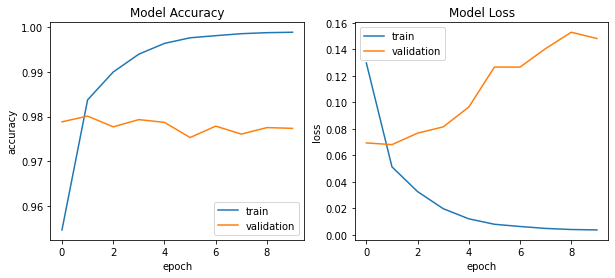

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

In [ ]:
# predict class with test set
y_pred_test =  np.argmax(model.predict(X_test), axis=1)
print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
print(classification_report(np.argmax(y_test,axis=1), y_pred_test))


2022-06-26 10:42:52.277677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Accuracy:	97.7%
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     23623
           1       0.99      0.99      0.99     36867
           2       0.98      0.98      0.98     40532

    accuracy                           0.98    101022
   macro avg       0.98      0.98      0.98    101022
weighted avg       0.98      0.98      0.98    101022



2    40532
1    36867
0    23623
dtype: int64
2    40657
1    36831
0    23534
dtype: int64


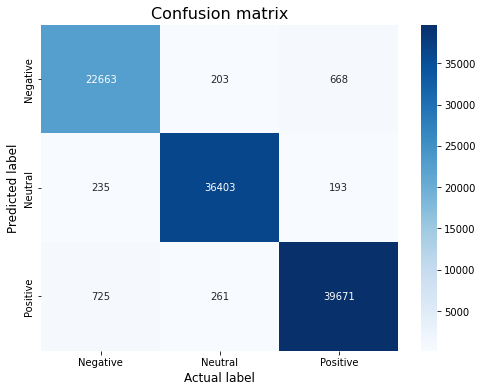

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

(505106, 1000)

# All Code Below is old and wont be used

In [ ]:
# def remove_URL(text):
#     url = re.compile(r'https?://\S+|www\.\S+')
#     return url.sub(r'',text)

In [ ]:
# tweets['Text']=tweets['Text'].apply(lambda x : remove_URL(x))

In [ ]:
# tweets['Text'][13]

"@Dame__Jane @NewshubPolitics Red wine and chilies —  has been the talk around the football field for weeks everyone has covid. No one's socially distancing, kids are partying till late in Karangahape Road, bringing covid home and spreading it around #redwine #chllies #CCPvirus #ChineseVirus #wuflue #batstew"

In [ ]:
# tweets['Text'][1233]

'@globaltimesnews #China is filling its stomach by spreading the #chinesevirus all over the world and destroying the economy of other countries.'

## Removing usermentions, ampersand '&' and new line characters

In [ ]:
# def remove_user(text):
#     url = re.compile(r'@\w+|&\w+')
#     return url.sub(r'',text)

# def remove_n(text):
#     return text.replace('\n', '')


In [ ]:
# tweets['Text']=tweets['Text'].apply(lambda x : remove_user(x))
# tweets['Text']=tweets['Text'].apply(lambda x : remove_n(x))

In [ ]:
# tweets['Text'][411261]

'#HersheyPA team members share what #AAPIHMonth means to them,  #diversity #inclusion #equity #inclusionmatters #AAPIHM #AAPI #diversityandinclusion #team '

In [ ]:
# tweets['Text'][13]

"  Red wine and chilies —  has been the talk around the football field for weeks everyone has covid. No one's socially distancing, kids are partying till late in Karangahape Road, bringing covid home and spreading it around #redwine #chllies #CCPvirus #ChineseVirus #wuflue #batstew"

## Removing Hashtags

In [ ]:
# def clean_hashtags(tweet):
#     clean = re.compile(r'#\w+')
#     return clean.sub(r'',tweet)



In [ ]:
# tweets['Text']=tweets['Text'].apply(lambda x : clean_hashtags(x))

In [ ]:
# tweets['Text'][13]

"  Red wine and chilies —  has been the talk around the football field for weeks everyone has covid. No one's socially distancing, kids are partying till late in Karangahape Road, bringing covid home and spreading it around      "

In [ ]:
# tweets['Text'][411261]

' team members share what  means to them,          '

## Convert contractions like "can't" into "can not"

In [ ]:
# 

' team members share what  means to them,          '

'  Red wine and chilies —  has been the talk around the football field for weeks everyone has covid. No one is socially distancing, kids are partying till late in Karangahape Road, bringing covid home and spreading it around      '

### Removing Space

In [ ]:
# def clean(text):
#     text = re.sub('\s{2,}', ' ', text)
#     return text

# tweets['Text']=tweets['Text'].apply(lambda x : clean(x))
# tweets['Text'][55]
# tweets['Text'][13]

' Red wine and chilies — has been the talk around the football field for weeks everyone has covid. No one is socially distancing, kids are partying till late in Karangahape Road, bringing covid home and spreading it around '

## Removing more than one space

In [ ]:
# def remove_emoji(text):
#     emoji_pattern = re.compile(
#         "["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#         u"\U00002702-\U000027B0"
#         u"\U000024C2-\U0001F251"
#         "]+",
#         flags=re.UNICODE)
#     return emoji_pattern.sub(r'', text)

# tweets['Text']=tweets['Text'].apply(lambda x : remove_emoji(x))
# tweets['Text'][55]
# tweets['Text'][13]


' Red wine and chilies — has been the talk around the football field for weeks everyone has covid. No one is socially distancing, kids are partying till late in Karangahape Road, bringing covid home and spreading it around '

### Punctuation

In [ ]:
# def remove_punct(text):
#     text = re.sub(r'([\'\"\(\)\!\?\\\/])', r' \1 ', text)
#     text = re.sub(r'[^\w\s\?\.\,]', ' ', text)
#     return text
# tweets['Text']=tweets['Text'].apply(lambda x : remove_punct(x))
# tweets['Text'][2]


' once again the entitled nyt wants to lecture the darker colored while every week their neighborhood witnesses school shootings, mall killings, baby formula shortage etc. cases are over 200000 a day in us.speak about being indifferent to one is ass being on fire.'

## Converting to lowercase

In [ ]:
# tokenizer = TweetTokenizer(preserve_case=False, 
#                             strip_handles=True,
#                             reduce_len=True)

# # # tokenize the tweets
# tweet_tokens = tokenizer.tokenize(tweets['Text'])



# # New lematization
# from nltk.stem import WordNetLemmatizer
# import nltk
# #nltk.download('omw-1.4')
# wml = WordNetLemmatizer()
# lemma_words=[]
# for word in tweet_tokens:
#     tokens = wml.lemmatize(word)
#     lemma_words.append(tokens)

TypeError: expected string or buffer

### Tokenization and Stemming

In [ ]:

# from nltk.stem.porter import *
# tokenized_tweet = tweets['Text'].apply(lambda x: x.split())
# stemmer = PorterStemmer()
# stemming_tweets = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])


SyntaxError: invalid syntax (2571446369.py, line 6)

In [ ]:
# stopwords_english = stopwords.words('english')
# tweets_clean = []

# for word in lemma_words: # Go through every word in your tokens list
#     if word not in stopwords_english: # remove stopwords
#         tweets_clean.append(word)

[' i think twitter bird is now free. but you are in cage of china ',
 ' there has been a sea change in indian temperament lately. 2 yrs of , galwan and subsequent attitude   sensibilities of some and their silence too, to various socio issues has pulled their veil off....country is not taking any bs narrative, for good ',
 ' once again the entitled nyt wants to lecture the darker colored while every week their neighborhood witnesses school shootings, mall killings, baby formula shortage etc. cases are over 200000 a day in us.speak about being indifferent to one is ass being on fire.']

### Removing Stop Words


In [ ]:
# tweets_clean = []

# for word in stemming_tweets: # Go through every word in your tokens list
#     if word not in stopwords.words('english'):
#         tweets_clean.append(word)

# tweets_clean[:33]

[['i',
  'think',
  'twitter',
  'bird',
  'is',
  'now',
  'free.',
  'but',
  'you',
  'are',
  'in',
  'cage',
  'of',
  'china'],
 ['there',
  'ha',
  'been',
  'a',
  'sea',
  'chang',
  'in',
  'indian',
  'tempera',
  'lately.',
  '2',
  'yr',
  'of',
  ',',
  'galwan',
  'and',
  'subsequ',
  'attitud',
  'sensibl',
  'of',
  'some',
  'and',
  'their',
  'silenc',
  'too,',
  'to',
  'variou',
  'socio',
  'issu',
  'ha',
  'pull',
  'their',
  'veil',
  'off....countri',
  'is',
  'not',
  'take',
  'ani',
  'bs',
  'narrative,',
  'for',
  'good'],
 ['onc',
  'again',
  'the',
  'entitl',
  'nyt',
  'want',
  'to',
  'lectur',
  'the',
  'darker',
  'color',
  'while',
  'everi',
  'week',
  'their',
  'neighborhood',
  'wit',
  'school',
  'shootings,',
  'mall',
  'killings,',
  'babi',
  'formula',
  'shortag',
  'etc.',
  'case',
  'are',
  'over',
  '200000',
  'a',
  'day',
  'in',
  'us.speak',
  'about',
  'be',
  'indiffer',
  'to',
  'one',
  'is',
  'ass',
  'be',

In [ ]:
# #plot hist of tweet length
# plt.figure(figsize=(10, 5))
# sns.histplot([len(s) for s in tweets.Text], bins=100)
# plt.title('Tweet Length')
# plt.show()

## Saving CSV

In [ ]:
#tweets.to_csv('data//minimum_cleaned_tweets_test_punc.csv', index=False)

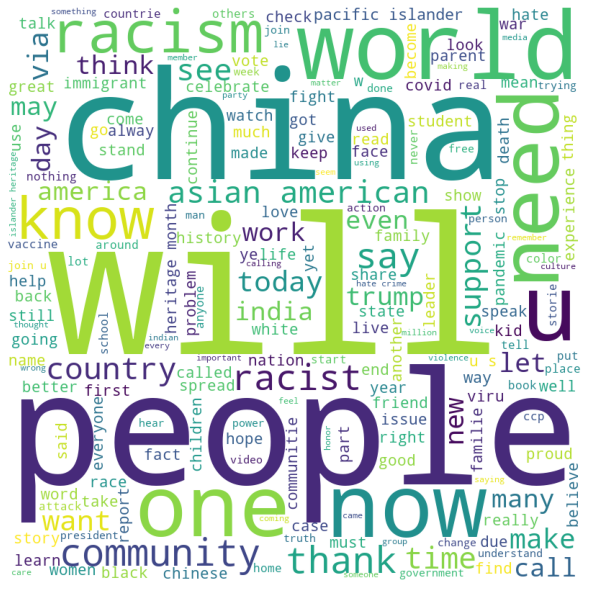

In [ ]:
# comment_words = ''
# stopwords = set(STOPWORDS)

# for val in tweets_clean:
#     # typecaste each val to string
#     val = str(val)
 
#     # split the value
#     tokens = val.split()
     
#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()
     
#     comment_words += " ".join(tokens)+" "
    
# wordcloud = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(comment_words)
 
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
 
# plt.show()

# LAB

In [ ]:
# Do the same steps for all the reviews in the dataset using the for loop
corpus = [] # Build a new list for all the words from all the reviews
# corpus is a collection of text and a common term used in NLP
for i in range (0, len(df['Text'])):
    review = re.sub('[^a-zA-Z]', ' ', df['Text'][i] )
    review = review.lower()
    review = review.split()
    ps =PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus

['still allow quot ancient chines proverb racist racismisaviru',
 'power chines viru thing realli shown us crazi low iq peopl went sam club costco morn store line wrap around build get insid fuck left disappoint human',
 'cnbc tedro reiter viru could still turn pandem urg fear panic ad greatest enemi right viru fear rumor stigma via',
 'heighten racism experienc asian commun surpris mani peopl belief racial progress widespread american societi covid racismisaviru strongertogeth asianamerican',
 'coronaviru nepali china kp oli direct offici bring back nepali wuhan china keep',
 'iamnotaviru heard use imag articl covid patient outsid china',
 'proven past year hate american america place countri risk busi fake impeach worri chines viru pelosi want tri money',
 'fact coronaviru probabl come us becom world pandem fact legaci media democrat tri blame fact ought preempt china commi nation narrow window make abundantli clear',
 'last fuck time coronaviru excus racist asian',
 'think campaign 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
corpus = vectorizer.fit_transform(corpus).toarray()
X=corpus

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

### Apply the Machine learning models onto this TF-IDF model (all 5)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2,random_state = 0)

# Fitting classifier to the Training set

classifier=GaussianNB()
classifier.fit(X_train,y_train)

# Predicting the Test set results 
y_pred=classifier.predict(X_test)

# Make the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, range(3),range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

#calculating precision and reall
# precision = precision_score(y_test, y_pred)
# print(precision)
#recall = recall_score(y_test, pred)
print(f1_score(y_test, y_pred))


# Evaluate the results

# TP=cm[0][0]
# TN=cm[1][1]
# FP=cm[0][1]
# FN=cm[1][0]
# Accuracy=(TP+TN)/(TP+TN+FP+FN)
# Precison=TP/(TP+FP)
# Recall=TP/(TP+FN)
# F1score=(2*Precison*Recall)/(Precison+Recall)

# print ("******Model Statistics ******")
# print ("Accuracy of Model = ",Accuracy)
# print ("Precison of Model = ",Precison)
# print ("Recall of Model   = ",Recall)
# print ("F1score of Model  = ",F1score)
# print ("****************************")

NameError: name 'X' is not defined

******Model Statistics ******
Accuracy of Model =  0.5802469135802469
Precison of Model =  1.0
Recall of Model   =  0.5574837310195228
F1score of Model  =  0.7158774373259054
****************************


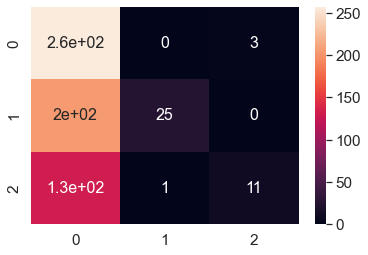

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2,random_state = 0)

# Fitting classifier to the Training set

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting the Test set results 
y_pred=knn.predict(X_test)

# Make the Confusion Matrix
Confusion_Matrix = confusion_matrix(y_test, y_pred)


# Evaluate the results
cm=confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, range(3),range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

# Evaluate the results

TP=cm[0][0]
TN=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]
Accuracy=(TP+TN)/(TP+TN+FP+FN)
Precison=TP/(TP+FP)
Recall=TP/(TP+FN)
F1score=(2*Precison*Recall)/(Precison+Recall)

print ("******Model Statistics ******")
print ("Accuracy of Model = ",Accuracy)
print ("Precison of Model = ",Precison)
print ("Recall of Model   = ",Recall)
print ("F1score of Model  = ",F1score)
print ("****************************")

******Model Statistics ******
Accuracy of Model =  0.8818565400843882
Precison of Model =  0.9349593495934959
Recall of Model   =  0.8518518518518519
F1score of Model  =  0.8914728682170544
****************************


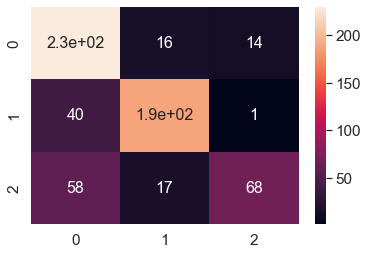

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2,random_state = 0)

clf = SVC(kernel = 'linear')



# Fitting classifier to the Training set

clf.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = clf.predict(X_test)

# Make the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, range(3),range(3))

sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

# Evaluate the results

TP=cm[0][0]
TN=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]
Accuracy=(TP+TN)/(TP+TN+FP+FN)
Precison=TP/(TP+FP)
Recall=TP/(TP+FN)
F1score=(2*Precison*Recall)/(Precison+Recall)

print ("******Model Statistics ******")
print ("Accuracy of Model = ",Accuracy)
print ("Precison of Model = ",Precison)
print ("Recall of Model   = ",Recall)
print ("F1score of Model  = ",F1score)
print ("****************************")

******Model Statistics ******
Accuracy of Model =  0.8981900452488688
Precison of Model =  0.918552036199095
Recall of Model   =  0.8826086956521739
F1score of Model  =  0.9002217294900222
****************************


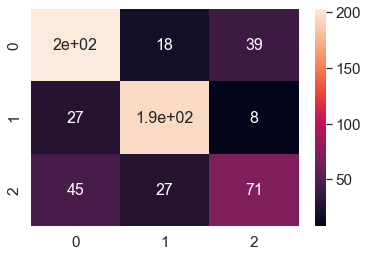

In [ ]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2,random_state = 0)

# Fitting classifier to the Training set

dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state= 0)
dt_clf.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = dt_clf.predict(X_test)

# Make the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, range(3),range(3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

# Evaluate the results

TP=cm[0][0]
TN=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]
Accuracy=(TP+TN)/(TP+TN+FP+FN)
Precison=TP/(TP+FP)
Recall=TP/(TP+FN)
F1score=(2*Precison*Recall)/(Precison+Recall)

print ("******Model Statistics ******")
print ("Accuracy of Model = ",Accuracy)
print ("Precison of Model = ",Precison)
print ("Recall of Model   = ",Recall)
print ("F1score of Model  = ",F1score)
print ("****************************")

******Model Statistics ******
Accuracy of Model =  0.9029535864978903
Precison of Model =  0.944
Recall of Model   =  0.8805970149253731
F1score of Model  =  0.9111969111969112
****************************


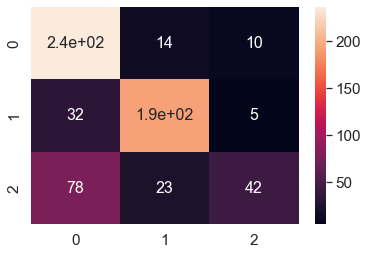

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2,random_state = 0)
# Fitting classifier to the Training set

model = RandomForestClassifier(n_estimators = 10,
                            criterion = 'entropy',random_state=0)

model.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model.predict(X_test)

# Make the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, range(3),range(3))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

# Evaluate the results

TP=cm[0][0]
TN=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]
Accuracy=(TP+TN)/(TP+TN+FP+FN)
Precison=TP/(TP+FP)
Recall=TP/(TP+FN)
F1score=(2*Precison*Recall)/(Precison+Recall)

print ("******Model Statistics ******")
print ("Accuracy of Model = ",Accuracy)
print ("Precison of Model = ",Precison)
print ("Recall of Model   = ",Recall)
print ("F1score of Model  = ",F1score)
print ("****************************")